## Sentiment Analysis

In this lesson, we're going to learn how to use [VADER](https://github.com/cjhutto/vaderSentiment), an English-language sentiment analysis tool designed for use with social media texts. This tool helps to calculate whether texts expresses positive or negative sentiment.

What is "sentiment"? According to VADER's creators, C.J. Hutto and Eric Gilbert:

>" Sentiment analysis, or opinion mining, is an active area of study in the field of natural language processing that analyzes people's **opinions, sentiments, evaluations, attitudes, and emotions** via the computational treatment of subjectivity in text."

> -["VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text,"](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122) C.J. Hutto Eric Gilbert

In this lesson, we will cover how to use VADER to:
- Calculate sentiment for individual sentences, thousands of tweets, and a short story
- Create a plot of how sentiment fluctuates over time or throughout a text
---

## Dataset

### *Lost in the City* by Edward P. Jones

<blockquote class="epigraph" style=" padding: 10px">

 [T]he pigeon had taken a step and dropped from the ledge. He caught an upwind that took him nearly as high as the tops of the empty K Street houses. He flew farther into Northeast, into the color and sounds of the city's morning. She did nothing, aside from following him, with her eyes, with her heart, as far as she could.
    
<p class ="attribution">—Edward P. Jones, "The Girl Who Raised Pigeons," <i>Lost in the City<i/> (1993) <p/>
    
</blockquote>

Edward P. Jones's *Lost in the City* (1993) is a collection of 14 short stories set in Washington D.C. The first short story, "The Girl Who Raised Pigeons," begins with a young girl raising homing pigeons on her roof.

How distinctive is a "pigeon" in the world of *Lost in the City*? What does this uniqueness (or lackthereof) tell us about the meaning of pigeons in first short story "The Girl Who Raised Pigeons" and the collection as a whole? These are just a few of the questions that we're going to try to answer with tf-idf.

## The Backstory of VADER, and How It Works

VADER, which stands for **V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner, calculates the sentiment of texts by referring to a lexicon of words that have been assigned sentiment scores as well as by using a handful of simple rules. This tool was designed by C.J. Hutto and Eric Gilbert, and you can read more about its purpose and creation in [their published paper](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122).

Here's a summary version: VADER's lexicon was created by enlisting 10 different people to rate thousands of words positively or negatively on a scale of -4 to 4 (you can scroll through the [lexicon on GitHub](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt) and check it out for yourself — each line consists of a word, the mean rating, standard deviation, and 10 individual human ratings).

For example, you can see that the word [*crappy*](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L1622) has a mean rating of -2.5 and the word [*bliss*](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L1127) has a mean rating of 2.7. If you look at the 10 individual ratings, you can see that one person rated *bliss* as a 4, and another person rated *bliss* as a 1. This raises the question: just how "positive" is the word *bliss*? What do you think?

What about [*cutesie*](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L1721)? It has a mean rating of 1, but two people rated it as a -1, and five people rated as a 2. Is *cutesie* an admiring adjective — "[She was so cutesie I just had to talk to her](https://www.urbandictionary.com/define.php?term=Cutesie)" — or a diminutive slight — "Ugh, her apartment was too cutesie"?

These difficult questions come up repeatedly when you read through the lexicon. Of course, VADER is designed to generalize, and it is not expected to capture the nuances of every single text. At the same time, it's important to keep these questions close in mind whenever we use sentiment analysis tools: Does it matter that we're missing out on specific nuances? What exactly are we measuring with this tool? Is this the best tool for the job?

In addition to its lexcion, VADER also calculates sentiment by considering 5 relatively simple rules:

> 1. If there's punctuation, especially exclamation points, the sentiment intensity should be increased (e.g., "Mochi ice cream is bliss" 👍 vs "Mochi ice cream is bliss!!!" 👍👍👍 )

> 2. If there's capitalization, especially all caps, the sentiment intensity should be increased (e.g., "Mochi ice cream is bliss" 👍 vs "Mochi ice cream is BLISS" 👍👍👍 )

> 3. If there are words like "extremely" or "absolutely", the sentiment should be increased ("Mochi ice cream is good" 👍  vs "Mochi ice cream is extremely good" 👍👍👍 )

> 4. If there's a "but" in a sentence, the polarity of the sentiment should shift, and the sentiment that follows the "but" should be prioritized (e.g., "Mochi ice cream is nice" 👍 vs "Mochi ice cream is nice, but it's a little blah" 👎 )

> 5. If there's a negation before an important word, the sentiment polarity should be flipped ("Mochi ice cream is my favorite" 👍 vs "Mochi ice cream is not my favorite" 👎 )


Because VADER uses a lexicon and simple rules, it works very fast and doesn't require any training or set up, unlike more sophisticated. machine learning approaches.

## Install and Import Libraries/Packages

Import Pandas and set Pandas display column width to 400 characters

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 400

Install [vaderSentiment package](https://github.com/cjhutto/vaderSentiment) with pip

In [2]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.3 MB/s eta 0:00:01


Import the `SentimentIntensityAnalyser` and initlaize it

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyser = SentimentIntensityAnalyzer()

## Calculate Sentiment Scores

To calculate sentiment scores for a sentence or paragraph, we can use the `.polarity_scores()` method.

In [4]:
sentimentAnalyser.polarity_scores("I like the Marvel movies")

{'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compound': 0.6486}

In [5]:
sentimentAnalyser.polarity_scores("I don't like the Marvel movies")

{'neg': 0.526, 'neu': 0.474, 'pos': 0.0, 'compound': -0.5334}

In [6]:
sentimentAnalyser.polarity_scores("I don't *not* like the Marvel movies")

{'neg': 0.255, 'neu': 0.546, 'pos': 0.199, 'compound': -0.1307}

## Calculate Sentiment Scores for *The House on Mango Street*

To calculate sentiment scores for *The House on Mango Street*, we first need a quick-and-easy way to break the novel up into sentences.

### Install and Import NLTK

Install [NLTK](https://www.nltk.org/), a Python library for text analysis natural language processing

In [7]:
!pip install nltk

Import nltk and download the model that will help us get sentences

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/melwalsh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Load Text and Break Into Sentences

Read in the text file for "Hairs"

In [99]:
trump_df = pd.read_csv('../texts/social-media/Trump_Tweets_2020.csv')
trump_df = trump_df.drop('id', axis='columns')
trump_texts = trump_df['text'].to_list()

In [100]:
trump_texts[0:10]

['To all of those who have asked, I will not be going to the Inauguration on January 20th.',
 'The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!!',
 'https://t.co/csX07ZVWGe',
 'These are the things and events that happen when a sacred landslide election victory is so unceremoniously &amp; viciously stripped away from great patriots who have been badly &amp; unfairly treated for so long. Go home with love &amp; in peace. Remember this day forever!',
 'https://t.co/Pm2PKV0Fp3',
 'I am asking for everyone at the U.S. Capitol to remain peaceful. No violence! Remember, WE are the Party of Law &amp; Order – respect the Law and our great men and women in Blue. Thank you!',
 'Please support our Capitol Police and Law Enforcement. They are truly on the side of our Country. Stay peaceful!',
 'Mike Pence didn’t have the co

In [101]:
for text in trump_texts[0:10]:
    print(text, "\n\n", sentimentAnalyser.polarity_scores(text), "\n---")

To all of those who have asked, I will not be going to the Inauguration on January 20th. 

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 
---
The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!! 

 {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.923} 
---
https://t.co/csX07ZVWGe 

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 
---
These are the things and events that happen when a sacred landslide election victory is so unceremoniously &amp; viciously stripped away from great patriots who have been badly &amp; unfairly treated for so long. Go home with love &amp; in peace. Remember this day forever! 

 {'neg': 0.098, 'neu': 0.693, 'pos': 0.209, 'compound': 0.814} 
---
https://t.co/Pm2PKV0Fp3 

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 
---
I am asking for everyone at the U.S. C

In [102]:
for text in trump_texts[0:10]:
    print(text, f"\n\nSentiment Score: {sentimentAnalyser.polarity_scores(text)['compound']}\n---")

To all of those who have asked, I will not be going to the Inauguration on January 20th. 

Sentiment Score: 0.0
---
The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!! 

Sentiment Score: 0.923
---
https://t.co/csX07ZVWGe 

Sentiment Score: 0.0
---
These are the things and events that happen when a sacred landslide election victory is so unceremoniously &amp; viciously stripped away from great patriots who have been badly &amp; unfairly treated for so long. Go home with love &amp; in peace. Remember this day forever! 

Sentiment Score: 0.814
---
https://t.co/Pm2PKV0Fp3 

Sentiment Score: 0.0
---
I am asking for everyone at the U.S. Capitol to remain peaceful. No violence! Remember, WE are the Party of Law &amp; Order – respect the Law and our great men and women in Blue. Thank you! 

Sentiment Score: 0.9611
---
Ple

In [103]:
def calculate_sentiment(text):
    scores = sentimentAnalyser.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

In [104]:
trump_df['sentiment_score'] = trump_df['text'].apply(calculate_sentiment)

In [106]:
trump_df.sort_values(by='sentiment_score', ascending=False)[:15]

,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,sentiment_score
23169,"Congratulations to Patrick Reed on his great and courageous MASTERS win! When Patrick had his amazing win at Doral 5 years ago, people saw his great talent, and a bright future ahead. Now he is the Masters Champion!",f,f,Twitter for iPhone,79374,10122,4/9/18 0:43,f,0.9899
5169,"Today, it was my great honor to proudly accept the endorsement of the @NYCPBA! I have deeply and profoundly admired the brave men and women of the #NYPD for my entire life. New York’s Finest are truly the best of the best — I will NEVER let you down! #MAGA https://t.co/o1l5kAx34v",f,f,Twitter for iPhone,86425,22183,8/15/20 3:59,f,0.9879
7200,"I am a big fan of Drew Brees. I think he’s truly one of the greatest quarterbacks, but he should not have taken back his original stance on honoring our magnificent American Flag. OLD GLORY is to be revered, cherished, and flown high...",f,f,Twitter for iPhone,267196,48513,6/5/20 20:08,f,0.9879
2490,"It was great to be back in North Carolina with thousands of loyal, hardworking American Patriots! This election is a simple choice: If Biden Wins, China Wins. When WE Win, YOU WIN, North Carolina WINS, and America WINS! https://t.co/jWYVYZdT3E",f,f,Twitter for iPhone,46024,10955,10/15/20 19:20,f,0.9876
11615,"95% Approval Rating in the Republican Party. Thank you! 191 Federal Judges (a record), and two Supreme Court Justices, approved. Best Economy &amp; Employment Numbers EVER. Thank you to our great New, Smart and Nimble REPUBLICAN PARTY. Join now, it’s where people want to be!",f,f,Twitter for iPhone,110818,23498,1/26/20 16:24,f,0.9869
40498,"Good luck and best wishes to my dear friend, the wonderful and very talented Joan Rivers! Winner of Celebrity Apprentice, amazing woman.",f,f,Twitter for Android,456,199,8/29/14 3:05,f,0.9857
15776,"We are all united by the same love of Country, the same devotion to family, and the same profound faith that America is blessed by the eternal grace of ALMIGHTY GOD! Bound by these convictions, we will campaign for every vote &amp, we will WIN the Great State of NEW MEXICO in 2020! https://t.co/BV5Wxs5GxE",f,f,Twitter for iPhone,73144,18191,9/17/19 3:42,f,0.9856
20188,"Here we go with Mitt Romney, but so fast! Question will be, is he a Flake? I hope not. Would much prefer that Mitt focus on Border Security and so many other things where he can be helpful. I won big, and he didn’t. He should be happy for all Republicans. Be a TEAM player &amp, WIN!",f,f,Twitter for iPhone,154068,30352,1/2/19 12:53,f,0.9843
20863,"Congressman Kevin Brady of Texas is so popular in his District, and far beyond, that he doesn’t need any help - but I am giving it to him anyway. He is a great guy and the absolute “King” of Cutting Taxes. Highly respected by all, he loves his State &amp, Country. Strong Endorsement!",f,f,Twitter for iPhone,49255,11554,10/30/18 12:25,f,0.9841
20136,"Congratulations to a truly great football team, the Clemson Tigers, on an incredible win last night against a powerful Alabama team. A big win also for the Great State of South Carolina. Look forward to seeing the team, and their brilliant coach, for the second time at the W.H.",f,f,Twitter for iPhone,118681,17159,1/8/19 14:42,f,0.9841


In [107]:
trump_df.sort_values(by='sentiment_score', ascending=True)[:15]

,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,sentiment_score
3728,"According to press reports, Iran may be planning an assassination, or other attack, against the United States in retaliation for the killing of terrorist leader Soleimani, which was carried out for his planning a future attack, murdering U.S. Troops, and the death &amp; suffering...",f,f,Twitter for iPhone,120885,32175,9/15/20 3:04,f,-0.9829
21749,"It is outrageous that Poisonous Synthetic Heroin Fentanyl comes pouring into the U.S. Postal System from China. We can, and must, END THIS NOW! The Senate should pass the STOP ACT – and firmly STOP this poison from killing our children and destroying our country. No more delay!",f,f,Twitter for iPhone,89183,23153,8/20/18 17:14,f,-0.9825
1552,"Our prayers are with the people of Vienna after yet another vile act of terrorism in Europe. These evil attacks against innocent people must stop. The U.S. stands with Austria, France, and all of Europe in the fight against terrorists, including radical Islamic terrorists.",f,f,Twitter for iPhone,236684,39564,11/3/20 4:25,f,-0.9810
7096,"Colin Powell was a pathetic interview today on Fake News CNN. In his time, he was weak &amp; gave away everything to everybody - so bad for the USA. Also got the “weapons of mass destruction” totally wrong, and you know what that mistake cost us? Sad! Only negative questions asked.",f,f,Twitter for iPhone,127934,28175,6/8/20 3:42,f,-0.9800
21818,"The Rigged Russian Witch Hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. All credibility is gone from this terrible Hoax, and much more will be lost as it proceeds. No Collusion!",f,f,Twitter for iPhone,66924,15264,8/15/18 14:08,f,-0.9785
20367,"At the request of many, I will be reviewing the case of a “U.S. Military hero,” Major Matt Golsteyn, who is charged with murder. He could face the death penalty from our own government after he admitted to killing a Terrorist bomb maker while overseas. @PeteHegseth @FoxNews",f,f,Twitter for iPhone,87158,21270,12/16/18 15:03,f,-0.9783
15969,"...But most importantly, @CNN is bad for the USA. Their International Division spews bad information &amp, Fake News all over the globe. This is why foreign leaders are always asking me, “Why does the Media hate the U.S. sooo much?” It is a fraudulent shame, &amp, all comes from the top!",f,f,Twitter for iPhone,45089,10539,9/9/19 13:01,f,-0.9773
432,"Swing States that have found massive VOTER FRAUD, which is all of them, CANNOT LEGALLY CERTIFY these votes as complete &amp; correct without committing a severely punishable crime. Everybody knows that dead people, below age people, illegal immigrants, fake signatures, prisoners,....",f,f,Twitter for iPhone,245205,60394,12/13/20 22:49,f,-0.9772
18393,"....employment numbers ever, low taxes &amp, regulations, a rebuilt military &amp, V.A., many great new judges, &amp, so much more. But we have had a giant SCAM perpetrated upon our nation, a Witch Hunt, a Treasonous Hoax. That is the Constitutional Crisis &amp, hopefully guilty people will pay!",f,f,Twitter for iPhone,63870,14228,5/12/19 21:35,f,-0.9771
19563,"...said was a total lie, but Fake Media won’t show it. I am an innocent man being persecuted by some very bad, conflicted &amp, corrupt people in a Witch Hunt that is illegal &amp, should never have been allowed to start - And only because I won the Election! Despite this, great success!",f,f,Twitter for iPhone,108241,21889,3/3/19 15:44,f,-0.9765


In [112]:
trump_df['date'] = pd.to_datetime(trump_df['date'])

<AxesSubplot:xlabel='date'>

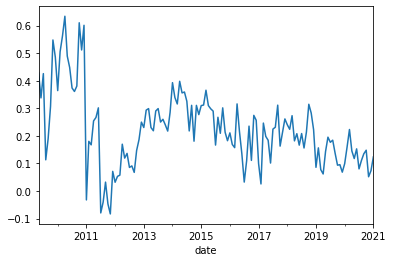

In [121]:
trump_df.set_index('date').resample('M')['sentiment_score'].mean().plot()

<AxesSubplot:xlabel='date'>

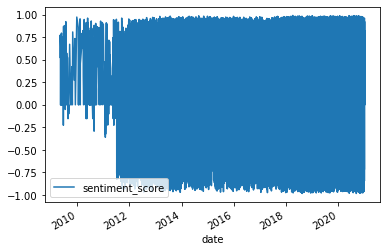

In [113]:
trump_df.plot(x='date', y='sentiment_score')

In [21]:
text_file = "../texts/literature/The-Yellow-Wallpaper_Charlotte-Perkins-Gilman.txt"
text = open(text_file, encoding="utf-8").read()

In [22]:
import math
number_of_chunks = 12

chunk_size = math.ceil(len(text) / number_of_chunks)

text_chunks = []

for number in range(0, len(text), chunk_size):
    text_chunk = text[number:number+chunk_size]
    text_chunks.append(text_chunk)

To break a string into individual sentences, we can use `nltk.sent_tokenize()`

In [26]:
intro = text_chunks[0]

In [27]:
nltk.sent_tokenize(intro)

['THE YELLOW WALLPAPER\n\nBy Charlotte Perkins Gilman\n\n\n\nIt is very seldom that mere ordinary people like John and myself secure\nancestral halls for the summer.',
 'A colonial mansion, a hereditary estate, I would say a haunted house, and\nreach the height of romantic felicity—but that would be asking too\nmuch of fate!',
 'Still I will proudly declare that there is something queer about it.',
 'Else, why should it be let so cheaply?',
 'And why have stood so long\nuntenanted?',
 'John laughs at me, of course, but one expects that in marriage.',
 'John is practical in the extreme.',
 'He has no patience with faith, an\nintense horror of superstition, and he scoffs openly at any talk of things\nnot to be felt and seen and put down in figures.',
 'John is a physician, and perhaps—(I would not say it to a living\nsoul, of course, but this is dead paper and a great relief to my\nmind)—perhaps that is one reason I do not get well faster.',
 'You see, he does not believe I am sick!',
 '

In [28]:
sentences = nltk.sent_tokenize(intro)

### Calculate Scores for Each Sentence

We can loop through the sentences and calculate sentiment scores for every sentence.

*How would we print just the "compound" score for each sentence?*

In [29]:
for sentence in sentences:
    scores = sentimentAnalyser.polarity_scores(sentence)
    
    print(sentence, '\n', scores, '\n')

THE YELLOW WALLPAPER

By Charlotte Perkins Gilman



It is very seldom that mere ordinary people like John and myself secure
ancestral halls for the summer. 
 {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.5994} 

A colonial mansion, a hereditary estate, I would say a haunted house, and
reach the height of romantic felicity—but that would be asking too
much of fate! 
 {'neg': 0.099, 'neu': 0.769, 'pos': 0.131, 'compound': -0.1511} 

Still I will proudly declare that there is something queer about it. 
 {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.5574} 

Else, why should it be let so cheaply? 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

And why have stood so long
untenanted? 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

John laughs at me, of course, but one expects that in marriage. 
 {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732} 

John is practical in the extreme. 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

He has n

### Make DataFrame

A convenient way to make a DataFrame is to first make a list of dictionaries.

Below we loop through the sentences, calculate sentiment scores, and then create a mini-dictionary with the sentence and compound score, which we append to the list `sentence_scores`.

In [30]:
sentence_scores = []
for sentence in sentences:
    scores = sentimentAnalyser.polarity_scores(sentence)
    sentence_scores.append({'sentence': sentence, 'score': scores['compound']})

To make this list of dictionaries into a DataFrame, we can simply use `pd.DataFrame()`

In [31]:
pd.DataFrame(sentence_scores)

,sentence,score
0,THE YELLOW WALLPAPER\n\nBy Charlotte Perkins Gilman\n\n\n\nIt is very seldom that mere ordinary people like John and myself secure\nancestral halls for the summer.,0.5994
1,"A colonial mansion, a hereditary estate, I would say a haunted house, and\nreach the height of romantic felicity—but that would be asking too\nmuch of fate!",-0.1511
2,Still I will proudly declare that there is something queer about it.,0.5574
3,"Else, why should it be let so cheaply?",0.0000
4,And why have stood so long\nuntenanted?,0.0000
5,"John laughs at me, of course, but one expects that in marriage.",0.2732
6,John is practical in the extreme.,0.0000
7,"He has no patience with faith, an\nintense horror of superstition, and he scoffs openly at any talk of things\nnot to be felt and seen and put down in figures.",-0.4215
8,"John is a physician, and perhaps—(I would not say it to a living\nsoul, of course, but this is dead paper and a great relief to my\nmind)—perhaps that is one reason I do not get well faster.",0.3877
9,"You see, he does not believe I am sick!",-0.5562


Let's examine the sentences from negative to positive sentiment scores.

In [32]:
hairs_df = pd.DataFrame(sentence_scores)
hairs_df.sort_values(by='score')

,sentence,score
18,"I sometimes fancy that in my condition if I had less opposition and more\nsociety and stimulus—but John says the very worst thing I can do is\nto think about my condition, and I confess it always makes me feel bad.",-0.8357
25,"There were greenhouses, too, but they are all broken now.",-0.6310
9,"You see, he does not believe I am sick!",-0.5562
7,"He has no patience with faith, an\nintense horror of superstition, and he scoffs openly at any talk of things\nnot to be felt and seen and put down in figures.",-0.4215
14,"Personally, I disagree with their ideas.",-0.3818
26,"There was some legal trouble, I believe, something about the heirs and\nco-heirs; anyhow, the place has be",-0.2960
19,So I will let it alone and talk about the house.,-0.2500
13,"So I take phosphates or phosphites—whichever it is, and tonics, and\njourneys, and air, and exercise, and am absolutely forbidden to “work”\nuntil I am well again.",-0.2484
1,"A colonial mansion, a hereditary estate, I would say a haunted house, and\nreach the height of romantic felicity—but that would be asking too\nmuch of fate!",-0.1511
10,And what can one do?,0.0000


### Calculate Sentiment Scores By Chapter

To calculate sentiment scores for the sentences in each chapter of *The House on Mango Street*, we need to read in each file indviidually.

Below we will import `glob` and `Path`, which will allow us to get all the filenames for the chapters and extract the titles.

In [ ]:
import glob
from pathlib import Path

Create a list of filenames for every `.txt` file in the directory

In [ ]:
directory_path = "../texts/literature/House-on-Mango-Street/"
text_files = glob.glob(f"{directory_path}/*.txt")

Loop through each file in the "House on Mango Street" directory, calculate sentiment scores, and make a list of dictionaries

In [34]:
sentence_scores = []

# Loop through all the filenames
for section_number, text_chunk in enumerate(text_chunks):
    
    #Read in the file
    #chapter = open(text_file, encoding="utf-8").read()
    #Extract the end of the filename
   # title = Path(text_file).stem
    
    #Loop through each sentence in the 
    for sentence in nltk.sent_tokenize(text_chunk):
        #Calculate sentiment scores for sentence
        scores = sentimentAnalyser.polarity_scores(sentence)
        
        #Make mini-dictionary with chapter name, sentence, and sentiment score
        sentence_scores.append({'section': section_number,
                                'sentence': sentence,
                                'score': scores['compound']})

In [ ]:
sentence_scores = []

# Loop through all the filenames
for text_file in text_files:
    
    #Read in the file
    chapter = open(text_file, encoding="utf-8").read()
    #Extract the end of the filename
    title = Path(text_file).stem
    
    #Loop through each sentence in the 
    for sentence in nltk.sent_tokenize(chapter):
        #Calculate sentiment scores for sentence
        scores = sentimentAnalyser.polarity_scores(sentence)
        
        #Make mini-dictionary with chapter name, sentence, and sentiment score
        sentence_scores.append({'chapter': title,
                                'sentence': sentence,
                                'score': scores['compound']})

Let's create a DataFrame from our list of dictionaries

In [37]:
chapter_df = pd.DataFrame(sentence_scores)
# Make the DataFrame alphabetical by chapter
chapter_df = chapter_df.sort_values(by='section')

How would we examine the most negative 15 sentences?

In [40]:
chapter_df.sort_values(by='score', ascending=True)[:15]

,section,sentence,score
48,1,"It is dull enough to confuse the eye in following, pronounced enough to\nconstantly irritate, and provoke study, and when you follow the lame,\nuncertain curves for a little distance they suddenly commit suicide—plunge\noff at outrageous angles, destroy themselves in unheard-of contradictions.",-0.9623
58,2,But these nervous troubles are dreadfully depressing.,-0.9442
33,1,"But John says if I feel so I shall neglect proper self-control; so I take\npains to control myself,—before him, at least,—and that makes\nme very tired.",-0.9298
354,11,"I tried to lift and push it until I was lame, and then I got so angry I\nbit off a little piece at one corner—but it hurt my teeth.",-0.8870
18,0,"I sometimes fancy that in my condition if I had less opposition and more\nsociety and stimulus—but John says the very worst thing I can do is\nto think about my condition, and I confess it always makes me feel bad.",-0.8357
206,7,"The color is hideous enough, and unreliable enough, and infuriating\nenough, but the pattern is torturing.",-0.8271
51,1,No wonder the children hated it!,-0.7712
236,8,"She didn’t know I was in the room, and when I asked her in a quiet, a very\nquiet voice, with the most restrained manner possible, what she was doing\nwith the paper she turned around as if she had been caught stealing,\nand looked quite angry—asked me why I should frighten her so!",-0.7500
357,11,All those strangled heads\nand bulbous eyes and waddling fungus growths just shriek with derision!,-0.7177
261,8,"I find it hovering in the dining-room, skulking in the parlor, hiding in\nthe hall, lying in wait for me on the stairs.",-0.6808


How would we examine the most positive 15 sentences?

In [41]:
chapter_df.sort_values(by='score', ascending=False)[:15]

,section,sentence,score
72,2,"“You know the place is doing you good,” he said, “and really, dear, I\ndon’t care to renovate the house just for a three months’ rental.”\n\n“Then do let us go downstairs,” I said, “there are such pretty rooms\nthere.”\n\nThen he took me in his arms and called me a blessed little goose, and said\nhe would go down cellar if I wished, and have it whitewashed into\nthe bargain.",0.9324
367,11,It is so pleasant to be out in this great room and creep around as I\nplease!,0.9137
96,3,"I remember what a kindly wink the knobs of our big old bureau used to\nhave, and there was one chair that always seemed like a strong friend.",0.9042
163,5,"He said I was his darling and his comfort and all he had, and that I must\ntake care of myself for his sake, and keep well.",0.8910
200,6,"There is nothing so dangerous, so fascinating,\nto a temperament like yours.",0.8894
112,4,"A lovely country, too, full of great\nelms and velvet meadows.",0.8360
319,10,"He asked me all sorts of questions, too, and pretended to be very loving\nand kind.",0.8341
153,5,But the effort is getting to be greater than the relief.,0.8126
107,3,"She is a perfect, and enthusiastic housekeeper, and hopes for no better\nprofession.",0.8071
45,1,"It is stripped\noff—the paper—in great patches all around the head of my bed,\nabout as far as I can reach, and in a great place on the other side of the\nroom low down.",0.8020


### Make a Plot Arc

To create a data visualization of sentiment over the course of *The House on Mango Street*, we first need to calculate the average sentiment for each chapter.

In [44]:
chapter_df.groupby('section')['score'].mean()

section
0     0.013970
1    -0.080652
2     0.179933
3     0.099080
4     0.098877
5     0.207465
6     0.225455
7    -0.044672
8     0.106218
9    -0.004787
10    0.138856
11    0.009667
Name: score, dtype: float64

In [45]:
chapter_means = chapter_df.groupby('section')['score'].mean().reset_index()

#### Bar Chart

In [47]:
import matplotlib.pyplot as plt

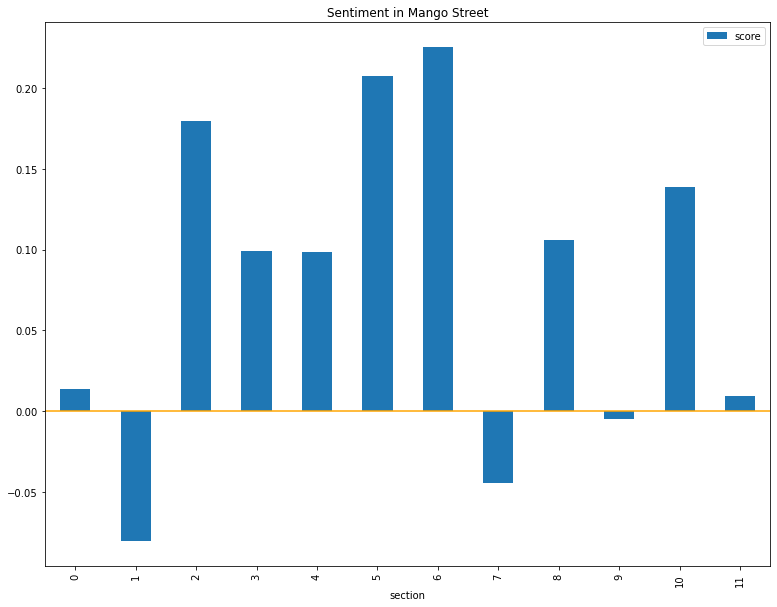

In [48]:
ax = chapter_means.plot(x='section', y='score', kind='bar',
                        figsize=(13,10), rot=90, title='Sentiment in Mango Street')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-')

#### Line Chart

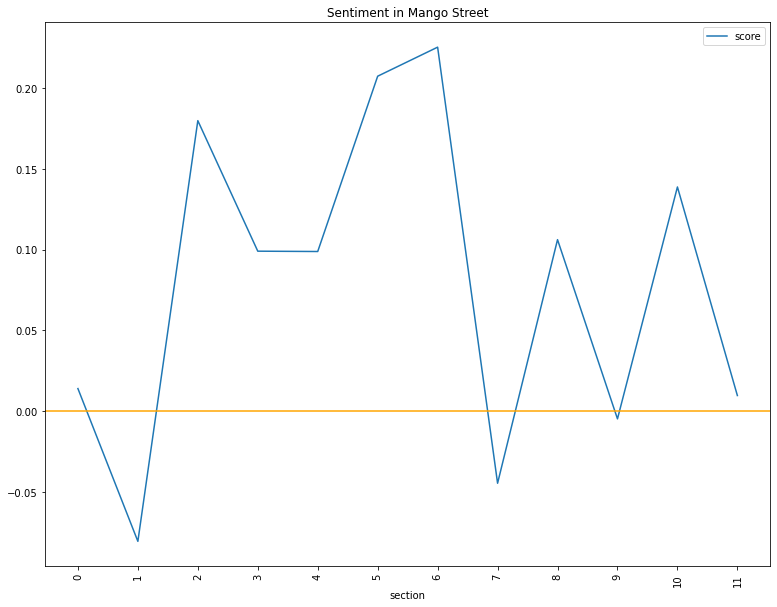

In [51]:
ax = chapter_means.plot(x='section', y='score', kind='line',
                        figsize=(13,10), rot=90, title='Sentiment in Mango Street')

#Not all xtick labels will show up in a line plot by default, so we have to make it explicit
ax.set_xticks(range(0, 12))
ax.set_xticklabels(chapter_means['section'].unique())

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-')
plt.show()

### Your Turn! 

How do these plot arcs align with your reading experience of *The House on Mango Street*? Examine some specific chapters and sentences below, and discuss how well VADER seems to be working or not working.

*Note: if you want to read the sentences in order, you can use the `.sort_index()` method*

In [ ]:
chapter_df[chapter_df['chapter'].str.contains('Papa-Who')]

Examine another chapter or chapters

In [ ]:
chapter_df[chapter_df['chapter'].str.contains('INSERT-PART-OF-CHAPTER-NAME')]

- How well do you think VADER sentiment analysis works with literary texts?
- How do social media posts and literary texts different in the way they express sentiment? (What is "sentiment", anyway?)
- Could you imagine using sentiment analysis in a project? If so, how?